# XylE data analysis


In [1]:
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../') # use modules in main directory

import genbank_utils as gu
import consensus_viz_utils as cu

# 1. Visualize the consensus motif

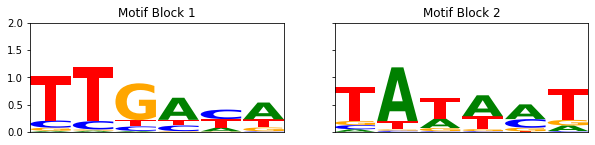

In [2]:
# Load BioPropsector output from predicting promoters from the top 3% of expressed loci
selection_f = "../n3_outdir/loci_in_top_3perc_upstream_regions_w300_min20_trunc_W6_w6_G18_g15_d1_a1_n200_1598952202_SELECTION.fa"
motif_blocks, m1, m2 = cu.build_2Bmotif_from_selection_file(selection_f)

In [3]:
motif_blocks

[('EQU24_RS02895',
  'EQU24_RS02895||exosortase system-associated protein, TIGR04073 family',
  'TTGACAACATTCAACCTTTAGGCTATTGT'),
 ('EQU24_RS02970',
  'EQU24_RS02970|pqqA|pyrroloquinoline quinone precursor peptide PqqA',
  'TTGCTTTGCCTAAATTATCGTCGTATACT'),
 ('EQU24_RS03495',
  'EQU24_RS03495||cold-shock protein',
  'TTGACTTTGGGGAAATAAGGCATAGAAT'),
 ('EQU24_RS07185',
  'EQU24_RS07185||glutamate--ammonia ligase',
  'TTGTAATTGAGATCAATTAGTTGCTTATAT'),
 ('EQU24_RS07390',
  'EQU24_RS07390|rpmI|50S ribosomal protein L35',
  'CTCAAGGAAACTTACTATTTTTAATCG'),
 ('EQU24_RS10370',
  'EQU24_RS10370|acpP|acyl carrier protein',
  'GTGATATTTTTATAATATAAAGTATAAT'),
 ('EQU24_RS12095',
  'EQU24_RS12095||cytochrome c',
  'TTGAATTTTTACGTTAAATCCCCTATTCT'),
 ('EQU24_RS12525',
  'EQU24_RS12525|ssrA|transfer-messenger RNA',
  'TTGCTAATGATGAATTTAATTGTTAATAT'),
 ('EQU24_RS15100',
  'EQU24_RS15100||HU family DNA-binding protein',
  'TTGACACTTTATGAGTCGTGTTGATATAAA'),
 ('EQU24_RS15535',
  'EQU24_RS15535||hypothetical 

# 2. Score consensus motif PSSM matches to hexamers of predicted promoters
The above motif was derived from the first 6 and final 6 bases of each predicted promoter from the set of top loci. Here, we simply apply this the Position Specific Scoring Matrix (PSSM) back to the inputs to gauge in general, how well does this motif match the inputs. If most inputs receive relatively high scores, it suggests that there was a clearer signal that was found among the promoter input sequences provided and the consensus summarizes the signal well across the top loci promoter predcitions. Lower scores indicate that the consensus didn't summarize the predictions very well (perhaps the signal it found wasn't very clear, there were multiple competing signals, or maybe individual inputs didn't have this particular promoter structure (possibly a different sigma factor structure)). 

In [4]:
hex_score_df = cu.score_predictions_to_motif(motif_blocks, m1, m2)
hex_score_df['spacer'] = hex_score_df['motif_block'].apply(lambda x: len(x) - 12)
hex_score_df.head()

,locus_tag,desc,motif_block,hex1,hex1_score,hex2,hex2_score,total_score,spacer
0,EQU24_RS02895,EQU24_RS02895||exosortase system-associated pr...,TTGACAACATTCAACCTTTAGGCTATTGT,TTGACA,8.353386,TATTGT,5.705159,14.058544,17
1,EQU24_RS02970,EQU24_RS02970|pqqA|pyrroloquinoline quinone pr...,TTGCTTTGCCTAAATTATCGTCGTATACT,TTGCTT,5.215478,TATACT,7.691535,12.907013,17
2,EQU24_RS03495,EQU24_RS03495||cold-shock protein,TTGACTTTGGGGAAATAAGGCATAGAAT,TTGACT,7.306080,TAGAAT,5.739588,13.045668,16
3,EQU24_RS07185,EQU24_RS07185||glutamate--ammonia ligase,TTGTAATTGAGATCAATTAGTTGCTTATAT,TTGTAA,5.040391,TTATAT,3.933783,8.974174,18
4,EQU24_RS07390,EQU24_RS07390|rpmI|50S ribosomal protein L35,CTCAAGGAAACTTACTATTTTTAATCG,CTCAAG,-0.801626,TAATCG,3.369716,2.568090,15


In [5]:
# write out df
#hex_score_df.to_csv('hex_scores.tsv', sep='\t', index=False)

In [5]:
# reload data with xyle info
xyle_df = pd.read_csv('hex_scores_xyle.txt',sep='\t')
xyle_df.head()

,locus_tag,desc,manual_desc,motif_block,hex1,hex1_score,hex2,hex2_score,total_score,spacer,rep1,rep2,rep3
0,EQU24_RS02895,EQU24_RS02895||exosortase system-associated pr...,exosortase system-associated protein - EQU24_R...,TTGACAACATTCAACCTTTAGGCTATTGT,TTGACA,8.353386,TATTGT,5.705159,14.058544,17,100,105,119
1,EQU24_RS02970,EQU24_RS02970|pqqA|pyrroloquinoline quinone pr...,PQQ precursor peptide (pqqA) - EQU24_RS02970,TTGCTTTGCCTAAATTATCGTCGTATACT,TTGCTT,5.215478,TATACT,7.691535,12.907013,17,204,148,128
2,EQU24_RS03495,EQU24_RS03495||cold-shock protein,cold-shock protein - EQU24_RS03495,TTGACTTTGGGGAAATAAGGCATAGAAT,TTGACT,7.306080,TAGAAT,5.739588,13.045668,16,150,143,192
3,EQU24_RS07185,EQU24_RS07185||glutamate--ammonia ligase,glutamate-ammonia ligase - EQU24_RS07185,TTGTAATTGAGATCAATTAGTTGCTTATAT,TTGTAA,5.040391,TTATAT,3.933783,8.974175,18,50,69,78
4,EQU24_RS07390,EQU24_RS07390|rpmI|50S ribosomal protein L35,50S ribosomal protein L35 - EQU24_RS07390,CTCAAGGAAACTTACTATTTTTAATCG,CTCAAG,-0.801626,TAATCG,3.369716,2.568090,15,243,222,201


In [6]:
xyle_df['mean_xyle'] = xyle_df.apply(lambda row: np.mean(row[['rep1','rep2','rep3']]),axis=1)
xyle_df['std_xyle'] = xyle_df.apply(lambda row: np.std(row[['rep1','rep2','rep3']]),axis=1)
xyle_df['std_low'] = xyle_df.apply(lambda row: row['mean_xyle'] - row['std_xyle'],axis=1)
xyle_df['std_high'] = xyle_df.apply(lambda row: row['mean_xyle'] + row['std_xyle'],axis=1)
xyle_df.head()

,locus_tag,desc,manual_desc,motif_block,hex1,hex1_score,hex2,hex2_score,total_score,spacer,rep1,rep2,rep3,mean_xyle,std_xyle,std_low,std_high
0,EQU24_RS02895,EQU24_RS02895||exosortase system-associated pr...,exosortase system-associated protein - EQU24_R...,TTGACAACATTCAACCTTTAGGCTATTGT,TTGACA,8.353386,TATTGT,5.705159,14.058544,17,100,105,119,108.000000,8.041559,99.958441,116.041559
1,EQU24_RS02970,EQU24_RS02970|pqqA|pyrroloquinoline quinone pr...,PQQ precursor peptide (pqqA) - EQU24_RS02970,TTGCTTTGCCTAAATTATCGTCGTATACT,TTGCTT,5.215478,TATACT,7.691535,12.907013,17,204,148,128,160.000000,32.166235,127.833765,192.166235
2,EQU24_RS03495,EQU24_RS03495||cold-shock protein,cold-shock protein - EQU24_RS03495,TTGACTTTGGGGAAATAAGGCATAGAAT,TTGACT,7.306080,TAGAAT,5.739588,13.045668,16,150,143,192,161.666667,21.638443,140.028224,183.305110
3,EQU24_RS07185,EQU24_RS07185||glutamate--ammonia ligase,glutamate-ammonia ligase - EQU24_RS07185,TTGTAATTGAGATCAATTAGTTGCTTATAT,TTGTAA,5.040391,TTATAT,3.933783,8.974175,18,50,69,78,65.666667,11.671428,53.995239,77.338094
4,EQU24_RS07390,EQU24_RS07390|rpmI|50S ribosomal protein L35,50S ribosomal protein L35 - EQU24_RS07390,CTCAAGGAAACTTACTATTTTTAATCG,CTCAAG,-0.801626,TAATCG,3.369716,2.568090,15,243,222,201,222.000000,17.146428,204.853572,239.146428


In [7]:
df = xyle_df.sort_values('mean_xyle',ascending=False)
df.head()

,locus_tag,desc,manual_desc,motif_block,hex1,hex1_score,hex2,hex2_score,total_score,spacer,rep1,rep2,rep3,mean_xyle,std_xyle,std_low,std_high
18,EQU24_RS19765,EQU24_RS19765|rnpB|RNase P RNA component class A,RNase P RNA component class A - EQU24_RS19765,CCGACATGTTTTTAATTCGCGTATAAT,CCGACA,3.049978,TATAAT,8.462053,11.512032,15,333,326,371,343.333333,19.770910,323.562423,363.104244
6,EQU24_RS12095,EQU24_RS12095||cytochrome c,cytochrome c - EQU24_RS12095,TTGAATTTTTACGTTAAATCCCCTATTCT,TTGAAT,5.952444,TATTCT,6.985267,12.937710,17,305,384,337,342.000000,32.444825,309.555175,374.444825
24,EQU24_RS22110,EQU24_RS22110||hypothetical protein,hypothetical protein - EQU24_RS22110,TTGATATTGCGGCAATCTACGTTAGAAT,TTGATA,8.222141,TAGAAT,5.739588,13.961729,16,304,321,314,313.000000,6.976150,306.023850,319.976150
8,EQU24_RS15100,EQU24_RS15100||HU family DNA-binding protein,HU family DNA-binding protein - EQU24_RS15100,TTGACACTTTATGAGTCGTGTTGATATAAA,TTGACA,8.353386,TATAAA,5.984006,14.337393,18,296,227,257,260.000000,28.248894,231.751106,288.248894
21,EQU24_RS21565,EQU24_RS21565||transaldolase,transaldolase - EQU24_RS21565,CCGATATAGGAATTTGCTGATTAAATACT,CCGATA,2.918734,AATACT,3.918946,6.837680,17,247,283,218,249.333333,26.587382,222.745951,275.920715


In [8]:
bar = alt.Chart(
    df,
).mark_bar().encode(
    x=alt.X('locus_tag:N',
            axis=alt.Axis(title="Top Gene"),
            sort=alt.EncodingSortField(field="mean_xyle", order='descending'),
           ),
    y=alt.Y('mean_xyle:Q',axis=alt.Axis(title="XylE Value")),
    tooltip=["desc:N","hex1:N",'hex2:N','total_score:Q','mean_xyle:Q'],
    #color=alt.Color('locus_tag:N')#,sort=alt.EncodingSortField(field="mean_xyle", order='descending')),
    #size=alt.value(100),
    #tooltip=["desc:N","hex1:N",'hex2:N','total_score:Q'],
).properties(
    width=800,
    height=400
)

error_bars = bar.mark_rule().encode(
  y=alt.Y('std_low:Q'),
  y2=alt.Y2('std_high:Q')
)

#alt.layer(bar, error_bars).resolve_scale(x='independent')
bar + error_bars

alt.LayerChart(...)

In [18]:
bar = alt.Chart(
    df,
).mark_bar().encode(
    y=alt.Y('desc:N',
            axis=alt.Axis(title=None),
            sort=alt.EncodingSortField(field="mean_xyle", order='descending'),
           ),
    x=alt.X('mean_xyle:Q',axis=alt.Axis(title="XylE Activity")),
    tooltip=["desc:N","hex1:N",'hex2:N','total_score:Q','mean_xyle:Q'],
    #color=alt.Color('locus_tag:N')#,sort=alt.EncodingSortField(field="mean_xyle", order='descending')),
    #size=alt.value(100),
    #tooltip=["desc:N","hex1:N",'hex2:N','total_score:Q'],
).properties(
    width=400,
    height=600
)

error_bars = bar.mark_rule().encode(
  x=alt.X('std_low:Q'),
  x2=alt.X2('std_high:Q')
)

#alt.layer(bar, error_bars).resolve_scale(x='independent')
chart = bar + error_bars
chart.configure_axis(
    labelFontSize=14,
    labelLimit=600
)

alt.LayerChart(...)

In [17]:
bar = alt.Chart(
    df,
).mark_bar().encode(
    y=alt.Y('manual_desc:N',
            axis=alt.Axis(title=None),
            sort=alt.EncodingSortField(field="mean_xyle", order='descending'),
           ),
    x=alt.X('mean_xyle:Q',axis=alt.Axis(title="XylE Activity")),
    tooltip=["desc:N","hex1:N",'hex2:N','total_score:Q','mean_xyle:Q'],
    #color=alt.Color('locus_tag:N')#,sort=alt.EncodingSortField(field="mean_xyle", order='descending')),
    #size=alt.value(100),
    #tooltip=["desc:N","hex1:N",'hex2:N','total_score:Q'],
).properties(
    width=400,
    height=600
)

error_bars = bar.mark_rule().encode(
  x=alt.X('std_low:Q'),
  x2=alt.X2('std_high:Q')
)

#alt.layer(bar, error_bars).resolve_scale(x='independent')
chart = bar + error_bars
chart.configure_axis(
    labelFontSize=14,
    labelLimit=600
)

alt.LayerChart(...)

In [16]:
bar = alt.Chart(
    df,
).mark_bar().encode(
    x=alt.X('manual_desc:N',
            axis=alt.Axis(title=None),
            sort=alt.EncodingSortField(field="mean_xyle", order='descending'),
           ),
    y=alt.Y('mean_xyle:Q',axis=alt.Axis(title="XylE Activity")),
    tooltip=["desc:N","hex1:N",'hex2:N','total_score:Q','mean_xyle:Q'],
    #color=alt.Color('locus_tag:N')#,sort=alt.EncodingSortField(field="mean_xyle", order='descending')),
    #size=alt.value(100),
    #tooltip=["desc:N","hex1:N",'hex2:N','total_score:Q'],
).properties(
    width=600,
    height=300
)

error_bars = bar.mark_rule().encode(
  y=alt.Y('std_low:Q'),
  y2=alt.Y2('std_high:Q')
)

#alt.layer(bar, error_bars).resolve_scale(x='independent')
chart = bar + error_bars
chart.configure_axis(
    labelFontSize=14,
    labelLimit=600,
    labelAngle=-45
)

alt.LayerChart(...)

# score vs xylE

In [19]:
# scatter plot of hex1 vs hex 2
scatter = alt.Chart(
    xyle_df,
).mark_circle().encode(
    x=alt.X('total_score:Q',axis=alt.Axis(title="PSSM Score")),
    y=alt.Y('mean_xyle:Q',axis=alt.Axis(title="XylE Acitivity")),
    color=alt.Color('spacer:N',scale=alt.Scale(scheme='set2'),sort='descending'),
    # sinebow, tableau10, viridis, set2
    size=alt.value(400),
    tooltip=["desc:N","hex1:N",'hex2:N','total_score:Q','mean_xyle:Q'],
).properties(
    width=400,
    height=400
).configure_axis(
    labelFontSize=14,
    titleFontSize=20
).interactive()




#combo.save('consensus_scatter.html')
scatter

alt.Chart(...)

# scramble data

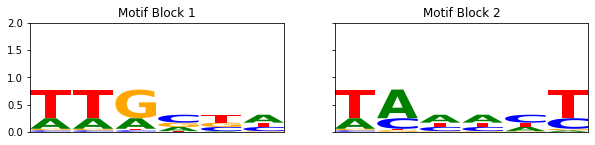

In [20]:
scramble_f = '../scramble_seqs.fa'
motif_blocks_sc, _, _ = cu.build_2Bmotif_from_selection_file(scramble_f)

In [21]:
motif_blocks_sc

[('EQU24_RS19315',
  'EQU24_RS19315|pmoC|wildtype',
  'TTGACAAGCCTTTTCGAAATGATAAACT'),
 ('EQU24_RS19315',
  'EQU24_RS19315|pmoC|35_scramble',
  'AAAGGCAGCCTTTTCGAAATGATAAACT'),
 ('EQU24_RS19315',
  'EQU24_RS19315|pmoC|10_scramble',
  'TTGACAAGCCTTTTCGAAATGAACCCTC'),
 ('EQU24_RS19315',
  'EQU24_RS19315|pmoC|spacer_scramble',
  'TTGACAAGCCTAGTAAGAATGATAAACT'),
 ('EQU24_RS02970',
  'EQU24_RS02970|pqqA|wildtype',
  'TTGCTTTGCCTAAATTATCGTCGTATACT'),
 ('EQU24_RS02970',
  'EQU24_RS02970|pqqA|35_scramble',
  'AAAGGCTGCCTAAATTATCGTCGTATACT'),
 ('EQU24_RS02970',
  'EQU24_RS02970|pqqA|10_scramble',
  'TTGCTTTGCCTAAATTATCGTCGACCCTC'),
 ('EQU24_RS02970',
  'EQU24_RS02970|pqqA|spacer_scramble',
  'TTGCTTTGCCTAGTAAGTCGTCGTATACT'),
 ('EQU24_RS12525',
  'EQU24_RS12525|ssrA|wildtype',
  'TTGCTAATGATGAATTTAATTGTTAATAT'),
 ('EQU24_RS12525',
  'EQU24_RS12525|ssrA|35_scramble',
  'AAAGGCATGATGAATTTAATTGTTAATAT'),
 ('EQU24_RS12525',
  'EQU24_RS12525|ssrA|10_scramble',
  'TTGCTAATGATGAATTTAATTGTACCCTC'),
 ('E

In [104]:
scramble_df = cu.score_predictions_to_motif(motif_blocks_sc, m1, m2)
scramble_df['gene'] = scramble_df['desc'].apply(lambda x: x.split("|")[1])
scramble_df['variant'] = scramble_df['desc'].apply(lambda x: x.split("|")[2])
scramble_df['spacer'] = scramble_df['motif_block'].apply(lambda x: len(x) - 12)
scramble_df

,locus_tag,desc,motif_block,hex1,hex1_score,hex2,hex2_score,total_score,gene,variant,spacer
0,EQU24_RS19315,EQU24_RS19315|pmoC|wildtype,TTGACAAGCCTTTTCGAAATGATAAACT,TTGACA,8.353386,TAAACT,6.554032,14.907417,pmoC,wildtype,16
1,EQU24_RS19315,EQU24_RS19315|pmoC|35_scramble,AAAGGCAGCCTTTTCGAAATGATAAACT,AAAGGC,-22.529325,TAAACT,6.554032,-15.975294,pmoC,35_scramble,16
2,EQU24_RS19315,EQU24_RS19315|pmoC|10_scramble,TTGACAAGCCTTTTCGAAATGAACCCTC,TTGACA,8.353386,ACCCTC,-20.944363,-12.590977,pmoC,10_scramble,16
3,EQU24_RS19315,EQU24_RS19315|pmoC|spacer_scramble,TTGACAAGCCTAGTAAGAATGATAAACT,TTGACA,8.353386,TAAACT,6.554032,14.907417,pmoC,spacer_scramble,16
4,EQU24_RS02970,EQU24_RS02970|pqqA|wildtype,TTGCTTTGCCTAAATTATCGTCGTATACT,TTGCTT,5.215478,TATACT,7.691535,12.907013,pqqA,wildtype,17
5,EQU24_RS02970,EQU24_RS02970|pqqA|35_scramble,AAAGGCTGCCTAAATTATCGTCGTATACT,AAAGGC,-22.529325,TATACT,7.691535,-14.837790,pqqA,35_scramble,17
6,EQU24_RS02970,EQU24_RS02970|pqqA|10_scramble,TTGCTTTGCCTAAATTATCGTCGACCCTC,TTGCTT,5.215478,ACCCTC,-20.944363,-15.728885,pqqA,10_scramble,17
7,EQU24_RS02970,EQU24_RS02970|pqqA|spacer_scramble,TTGCTTTGCCTAGTAAGTCGTCGTATACT,TTGCTT,5.215478,TATACT,7.691535,12.907013,pqqA,spacer_scramble,17
8,EQU24_RS12525,EQU24_RS12525|ssrA|wildtype,TTGCTAATGATGAATTTAATTGTTAATAT,TTGCTA,6.262784,TAATAT,6.618281,12.881065,ssrA,wildtype,17
9,EQU24_RS12525,EQU24_RS12525|ssrA|35_scramble,AAAGGCATGATGAATTTAATTGTTAATAT,AAAGGC,-22.529325,TAATAT,6.618281,-15.911044,ssrA,35_scramble,17


In [105]:
scramble_df.to_csv('scramble_df.tsv',sep='\t',index=False)

In [22]:
scramble_df2 = pd.read_csv('scramble_df.txt',sep='\t')

In [23]:
scramble_df2['mean_xyle'] = scramble_df2.apply(lambda row: np.mean(row[['rep1','rep2','rep3']]),axis=1)
scramble_df2['std_xyle'] = scramble_df2.apply(lambda row: np.std(row[['rep1','rep2','rep3']]),axis=1)
scramble_df2['std_low'] = scramble_df2.apply(lambda row: row['mean_xyle'] - row['std_xyle'],axis=1)
scramble_df2['std_high'] = scramble_df2.apply(lambda row: row['mean_xyle'] + row['std_xyle'],axis=1)
scramble_df2

,locus_tag,desc,motif_block,hex1,hex1_score,hex2,hex2_score,total_score,gene,variant,spacer,rep1,rep2,rep3,mean_xyle,std_xyle,std_low,std_high
0,EQU24_RS19315,EQU24_RS19315|pmoC|wildtype,TTGACAAGCCTTTTCGAAATGATAAACT,TTGACA,8.353386,TAAACT,6.554032,14.907417,pmoC,wildtype,16,100,105,119,108.000000,8.041559,99.958441,116.041559
1,EQU24_RS19315,EQU24_RS19315|pmoC|35_scramble,AAAGGCAGCCTTTTCGAAATGATAAACT,AAAGGC,-22.529325,TAAACT,6.554032,-15.975294,pmoC,35_scramble,16,10,14,20,14.666667,4.109609,10.557057,18.776276
2,EQU24_RS19315,EQU24_RS19315|pmoC|10_scramble,TTGACAAGCCTTTTCGAAATGAACCCTC,TTGACA,8.353386,ACCCTC,-20.944363,-12.590977,pmoC,10_scramble,16,13,18,11,14.000000,2.943920,11.056080,16.943920
3,EQU24_RS19315,EQU24_RS19315|pmoC|spacer_scramble,TTGACAAGCCTAGTAAGAATGATAAACT,TTGACA,8.353386,TAAACT,6.554032,14.907417,pmoC,spacer_scramble,16,138,183,195,172.000000,24.535688,147.464312,196.535688
4,EQU24_RS02970,EQU24_RS02970|pqqA|wildtype,TTGCTTTGCCTAAATTATCGTCGTATACT,TTGCTT,5.215478,TATACT,7.691535,12.907013,pqqA,wildtype,17,243,222,201,222.000000,17.146428,204.853572,239.146428
5,EQU24_RS02970,EQU24_RS02970|pqqA|35_scramble,AAAGGCTGCCTAAATTATCGTCGTATACT,AAAGGC,-22.529325,TATACT,7.691535,-14.837790,pqqA,35_scramble,17,30,22,28,26.666667,3.399346,23.267320,30.066013
6,EQU24_RS02970,EQU24_RS02970|pqqA|10_scramble,TTGCTTTGCCTAAATTATCGTCGACCCTC,TTGCTT,5.215478,ACCCTC,-20.944363,-15.728885,pqqA,10_scramble,17,23,27,29,26.333333,2.494438,23.838895,28.827772
7,EQU24_RS02970,EQU24_RS02970|pqqA|spacer_scramble,TTGCTTTGCCTAGTAAGTCGTCGTATACT,TTGCTT,5.215478,TATACT,7.691535,12.907013,pqqA,spacer_scramble,17,193,221,301,238.333333,45.762673,192.570661,284.096006
8,EQU24_RS12525,EQU24_RS12525|ssrA|wildtype,TTGCTAATGATGAATTTAATTGTTAATAT,TTGCTA,6.262784,TAATAT,6.618281,12.881065,ssrA,wildtype,17,296,227,257,260.000000,28.248894,231.751106,288.248894
9,EQU24_RS12525,EQU24_RS12525|ssrA|35_scramble,AAAGGCATGATGAATTTAATTGTTAATAT,AAAGGC,-22.529325,TAATAT,6.618281,-15.911044,ssrA,35_scramble,17,38,32,30,33.333333,3.399346,29.933987,36.732680


In [31]:
bar = alt.Chart().mark_bar().encode(
    x = alt.X('variant:N', title=None, axis=None, sort=['wildtype', '35_scramble', '10_scramble','spacer_scramble']),
    y = alt.Y('mean_xyle', title='XylE Activity'),
    color = alt.Color('variant:N', sort=['wildtype', '35_scramble', '10_scramble','spacer_scramble'],
                     legend=alt.Legend(title="Scramble Variant")),
    tooltip=["desc:N","hex1:N",'hex2:N','total_score:Q','mean_xyle:Q'],
)

error_bars = alt.Chart().mark_rule().encode(
  x = alt.X('variant:N', title=None, axis=None, sort=['wildtype', '35_scramble', '10_scramble','spacer_scramble']),
    y=alt.Y('std_low:Q'),
  y2=alt.Y2('std_high:Q')
)

alt.layer(bar, error_bars, data=scramble_df2).facet(
    column = alt.Column('gene:N', sort=['pmoC', 'pqqA', 'ssrA']),
    #header=alt.Header(labelFontSize=20)
).configure_axis(
    labelFontSize=14,
    titleFontSize=14,
    grid=False
    #headerFontSize=14
).configure_header(
    title=None,
    #titleFontSize=14,
    labelFontSize=14,
    labelOrient='bottom'
).configure_legend(
    labelFontSize=14,
    #title='Scramble Variant',
    titleFontSize=16
).configure_view(
    strokeOpacity=0
)

alt.FacetChart(...)

# score vs Xyle with scrambles

In [26]:
sub_scramble = scramble_df2[scramble_df2['variant']!='wildtype'].drop(['gene','variant'],axis=1)
sub_scramble['scramble'] = True
xyle_df['scramble'] = False

In [27]:
combo_xyle_df = pd.concat([xyle_df,sub_scramble])
combo_xyle_df


,locus_tag,desc,manual_desc,motif_block,hex1,hex1_score,hex2,hex2_score,total_score,spacer,rep1,rep2,rep3,mean_xyle,std_xyle,std_low,std_high,scramble
0,EQU24_RS02895,EQU24_RS02895||exosortase system-associated pr...,exosortase system-associated protein - EQU24_R...,TTGACAACATTCAACCTTTAGGCTATTGT,TTGACA,8.353386,TATTGT,5.705159,14.058544,17,100,105,119,108.000000,8.041559,99.958441,116.041559,False
1,EQU24_RS02970,EQU24_RS02970|pqqA|pyrroloquinoline quinone pr...,PQQ precursor peptide (pqqA) - EQU24_RS02970,TTGCTTTGCCTAAATTATCGTCGTATACT,TTGCTT,5.215478,TATACT,7.691535,12.907013,17,204,148,128,160.000000,32.166235,127.833765,192.166235,False
2,EQU24_RS03495,EQU24_RS03495||cold-shock protein,cold-shock protein - EQU24_RS03495,TTGACTTTGGGGAAATAAGGCATAGAAT,TTGACT,7.306080,TAGAAT,5.739588,13.045668,16,150,143,192,161.666667,21.638443,140.028224,183.305110,False
3,EQU24_RS07185,EQU24_RS07185||glutamate--ammonia ligase,glutamate-ammonia ligase - EQU24_RS07185,TTGTAATTGAGATCAATTAGTTGCTTATAT,TTGTAA,5.040391,TTATAT,3.933783,8.974175,18,50,69,78,65.666667,11.671428,53.995239,77.338094,False
4,EQU24_RS07390,EQU24_RS07390|rpmI|50S ribosomal protein L35,50S ribosomal protein L35 - EQU24_RS07390,CTCAAGGAAACTTACTATTTTTAATCG,CTCAAG,-0.801626,TAATCG,3.369716,2.568090,15,243,222,201,222.000000,17.146428,204.853572,239.146428,False
5,EQU24_RS10370,EQU24_RS10370|acpP|acyl carrier protein,acyl carrier protein - EQU24_RS10370,GTGATATTTTTATAATATAAAGTATAAT,GTGATA,4.380839,TATAAT,8.462053,12.842893,16,138,183,195,172.000000,24.535688,147.464312,196.535688,False
6,EQU24_RS12095,EQU24_RS12095||cytochrome c,cytochrome c - EQU24_RS12095,TTGAATTTTTACGTTAAATCCCCTATTCT,TTGAAT,5.952444,TATTCT,6.985267,12.937710,17,305,384,337,342.000000,32.444825,309.555175,374.444825,False
7,EQU24_RS12525,EQU24_RS12525|ssrA|transfer-messenger RNA,transfer-messenger RNA (ssrA) - EQU24_RS12525,TTGCTAATGATGAATTTAATTGTTAATAT,TTGCTA,6.262784,TAATAT,6.618281,12.881065,17,139,111,196,148.666667,35.367908,113.298759,184.034574,False
8,EQU24_RS15100,EQU24_RS15100||HU family DNA-binding protein,HU family DNA-binding protein - EQU24_RS15100,TTGACACTTTATGAGTCGTGTTGATATAAA,TTGACA,8.353386,TATAAA,5.984006,14.337393,18,296,227,257,260.000000,28.248894,231.751106,288.248894,False
9,EQU24_RS15535,EQU24_RS15535||hypothetical protein,hypothetical protein - EQU24_RS15535,TTTACTAAGAAAGGCTGATCAAGGTATAGT,TTTACT,4.755883,TATAGT,6.411427,11.167311,18,193,221,301,238.333333,45.762673,192.570661,284.096006,False


In [28]:
xyle_df.head()

,locus_tag,desc,manual_desc,motif_block,hex1,hex1_score,hex2,hex2_score,total_score,spacer,rep1,rep2,rep3,mean_xyle,std_xyle,std_low,std_high,scramble
0,EQU24_RS02895,EQU24_RS02895||exosortase system-associated pr...,exosortase system-associated protein - EQU24_R...,TTGACAACATTCAACCTTTAGGCTATTGT,TTGACA,8.353386,TATTGT,5.705159,14.058544,17,100,105,119,108.000000,8.041559,99.958441,116.041559,False
1,EQU24_RS02970,EQU24_RS02970|pqqA|pyrroloquinoline quinone pr...,PQQ precursor peptide (pqqA) - EQU24_RS02970,TTGCTTTGCCTAAATTATCGTCGTATACT,TTGCTT,5.215478,TATACT,7.691535,12.907013,17,204,148,128,160.000000,32.166235,127.833765,192.166235,False
2,EQU24_RS03495,EQU24_RS03495||cold-shock protein,cold-shock protein - EQU24_RS03495,TTGACTTTGGGGAAATAAGGCATAGAAT,TTGACT,7.306080,TAGAAT,5.739588,13.045668,16,150,143,192,161.666667,21.638443,140.028224,183.305110,False
3,EQU24_RS07185,EQU24_RS07185||glutamate--ammonia ligase,glutamate-ammonia ligase - EQU24_RS07185,TTGTAATTGAGATCAATTAGTTGCTTATAT,TTGTAA,5.040391,TTATAT,3.933783,8.974175,18,50,69,78,65.666667,11.671428,53.995239,77.338094,False
4,EQU24_RS07390,EQU24_RS07390|rpmI|50S ribosomal protein L35,50S ribosomal protein L35 - EQU24_RS07390,CTCAAGGAAACTTACTATTTTTAATCG,CTCAAG,-0.801626,TAATCG,3.369716,2.568090,15,243,222,201,222.000000,17.146428,204.853572,239.146428,False


In [32]:
# scatter plot of hex1 vs hex 2
scatter = alt.Chart(
    combo_xyle_df,
).mark_point().encode(
    x=alt.X('total_score:Q',axis=alt.Axis(title="PSSM Score")),
    y=alt.Y('mean_xyle:Q',axis=alt.Axis(title="XylE Value")),
    color=alt.Color('spacer:N',scale=alt.Scale(scheme='tableau10'),sort='descending'),
    # sinebow, tableau10, viridis, set2
    size=alt.value(400),
    shape='scramble:N',
    tooltip=["desc:N","hex1:N",'hex2:N','total_score:Q','mean_xyle:Q'],
).properties(
    width=400,
    height=400
).configure_axis(
    labelFontSize=14,
    titleFontSize=20
).interactive()




#combo.save('consensus_scatter.html')
scatter

alt.Chart(...)

In [33]:
# scatter plot of hex1 vs hex 2
filled = alt.Chart(
    xyle_df,
).mark_circle().encode(
    x=alt.X('total_score:Q',axis=alt.Axis(title="PSSM Score")),
    y=alt.Y('mean_xyle:Q',axis=alt.Axis(title="XylE Value")),
    color=alt.Color('spacer:N',scale=alt.Scale(scheme='set2'),sort='descending'),
    # sinebow, tableau10, viridis, set2
    size=alt.value(400),
    tooltip=["desc:N","hex1:N",'hex2:N','total_score:Q'],
).interactive()

donut = alt.Chart(
    sub_scramble,
).mark_point().encode(
    x=alt.X('total_score:Q',axis=alt.Axis(title="PSSM Score")),
    y=alt.Y('mean_xyle:Q',axis=alt.Axis(title="XylE Value")),
    color=alt.Color('spacer:N',scale=alt.Scale(scheme='set2'),sort='descending'),
    # sinebow, tableau10, viridis, set2
    size=alt.value(400),
    tooltip=["desc:N","hex1:N",'hex2:N','total_score:Q','mean_xyle:Q'],
).interactive()

#combo.save('consensus_scatter.html')
chart = filled + donut

chart.configure_axis(
    labelFontSize=14,
    titleFontSize=20
).properties(
    width=400,
    height=400
)

alt.LayerChart(...)